In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [190]:
# Load the dataset
df = pd.read_csv("survey_results_public.csv")

# Display basic info
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [191]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,29998.000000,1.758000e+04,15903.000000,15916.000000,15955.000000,15959.000000,15985.000000,15983.000000,15984.000000,15978.000000,15983.000000,15981.000000,1.746400e+04,15790.000000
mean,14999.500000,5.688282e+145,11.309879,18.735800,7.738092,10.344343,24.444741,22.968986,20.436914,16.196383,11.150613,10.198235,8.720847e+04,6.925079
std,8659.821024,7.542070e+147,9.041510,26.020223,18.720677,22.075780,27.026380,26.984865,26.148228,24.861291,23.192035,22.003593,2.084789e+05,2.107990
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,7500.250000,5.800000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.312100e+04,6.000000
50%,14999.500000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.000000,10.000000,5.000000,0.000000,0.000000,6.533100e+04,7.000000
75%,22498.750000,2.750000e+05,16.000000,25.000000,5.000000,10.000000,30.000000,30.000000,25.000000,20.000000,10.000000,10.000000,1.089060e+05,8.000000
max,29998.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [192]:
# Select relevant numeric columns
columns_to_keep = ["YearsCodePro", "ConvertedCompYearly", "Age","RemoteWork", "Employment"]
df1 = df[columns_to_keep]
df1.head()

,YearsCodePro,ConvertedCompYearly,Age,RemoteWork,Employment
0,NaN,NaN,Under 18 years old,Remote,"Employed, full-time"
1,17,NaN,35-44 years old,Remote,"Employed, full-time"
2,27,NaN,45-54 years old,Remote,"Employed, full-time"
3,NaN,NaN,18-24 years old,NaN,"Student, full-time"
4,NaN,NaN,18-24 years old,NaN,"Student, full-time"


In [193]:
# Rename columns for easier use
df1.rename(columns={"ConvertedCompYearly": "Salary"}, inplace=True)

# Convert YearsCodePro to numeric
df1["YearsCodePro"] = pd.to_numeric(df1["YearsCodePro"], errors='coerce')

# Drop rows with missing values
df1 = df1.dropna()

df1.head()

/var/folders/m2/c4gwpmp11dl6fhjw81j1xbf00000gp/T/ipykernel_13850/1275480882.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.rename(columns={"ConvertedCompYearly": "Salary"}, inplace=True)
/var/folders/m2/c4gwpmp11dl6fhjw81j1xbf00000gp/T/ipykernel_13850/1275480882.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["YearsCodePro"] = pd.to_numeric(df1["YearsCodePro"], errors='coerce')


,YearsCodePro,Salary,Age,RemoteWork,Employment
72,1.0,7322.0,18-24 years old,"Hybrid (some remote, some in-person)","Employed, full-time;Student, full-time;Indepen..."
374,6.0,30074.0,25-34 years old,"Hybrid (some remote, some in-person)","Employed, full-time"
379,6.0,91295.0,35-44 years old,Remote,"Employed, full-time"
385,17.0,53703.0,35-44 years old,Remote,"Independent contractor, freelancer, or self-em..."
389,7.0,110000.0,25-34 years old,Remote,"Employed, full-time;Student, part-time"


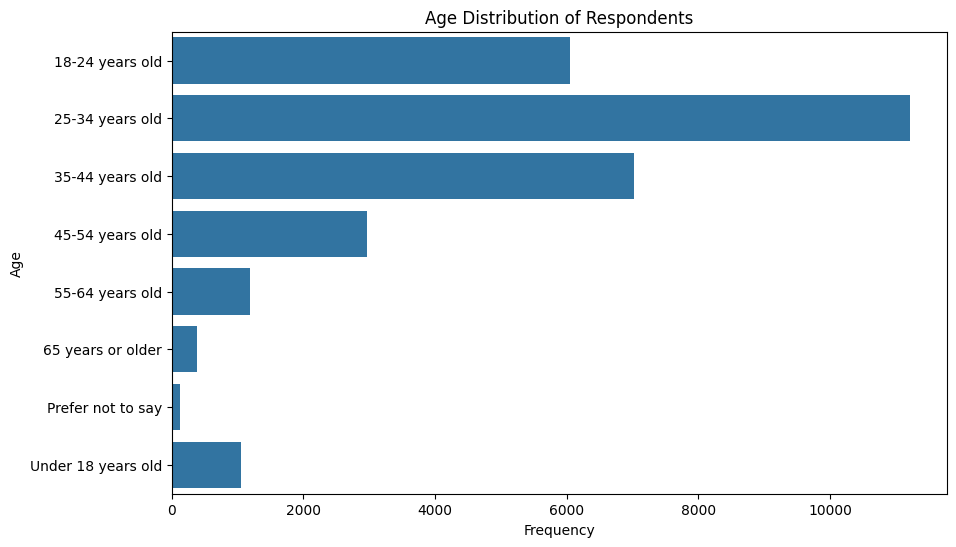

In [194]:
plt.figure(figsize=(10,6))
age_counts = df['Age'].value_counts().sort_index()
sns.barplot(x=age_counts.values, y=age_counts.index, orient='h')
plt.title('Age Distribution of Respondents')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.show()


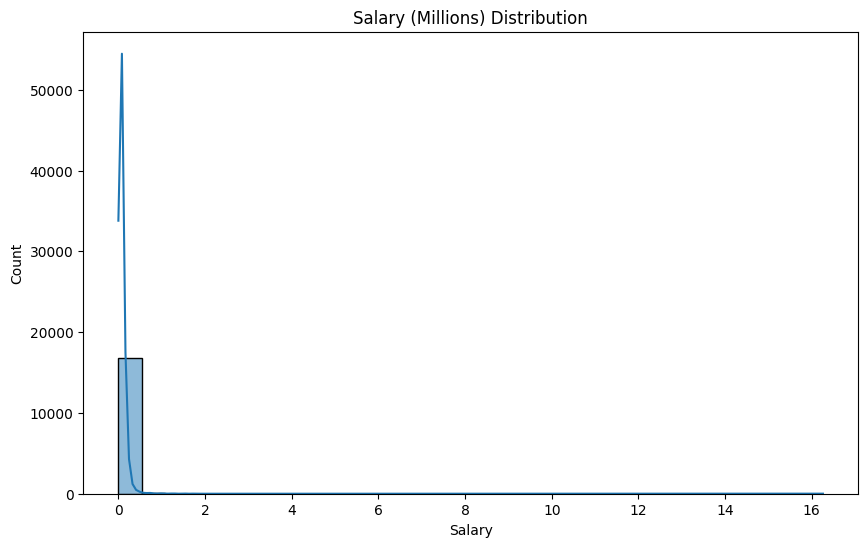

In [195]:
# Exploratory Data Analysis
plt.figure(figsize=(10,6))
sns.histplot(df1['Salary']/ 1e6, bins=30, kde=True)
plt.title("Salary (Millions) Distribution")
plt.show()

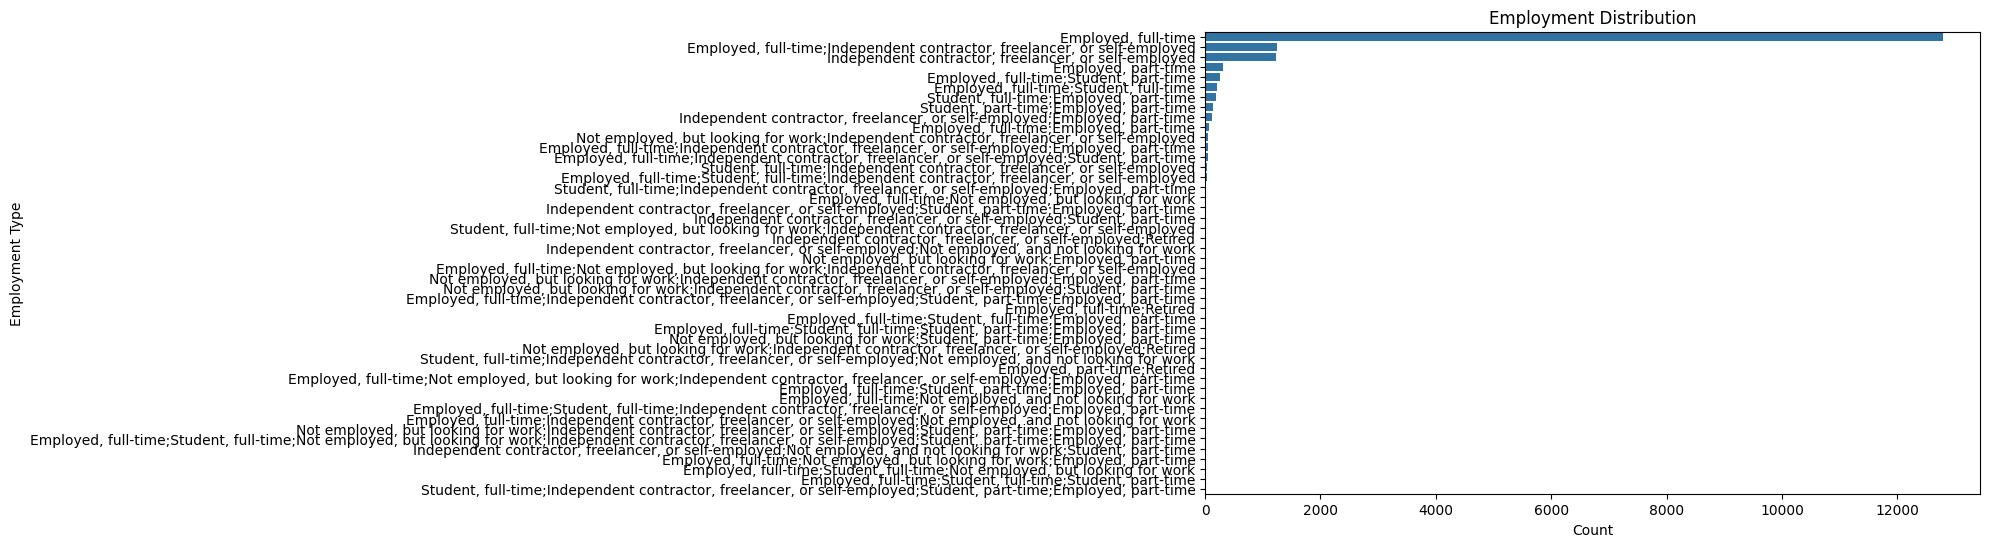

In [196]:
# Employment distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df1['Employment'], order=df1['Employment'].value_counts().index)
plt.title('Employment Distribution')
plt.xlabel('Count')
plt.ylabel('Employment Type')
plt.show()


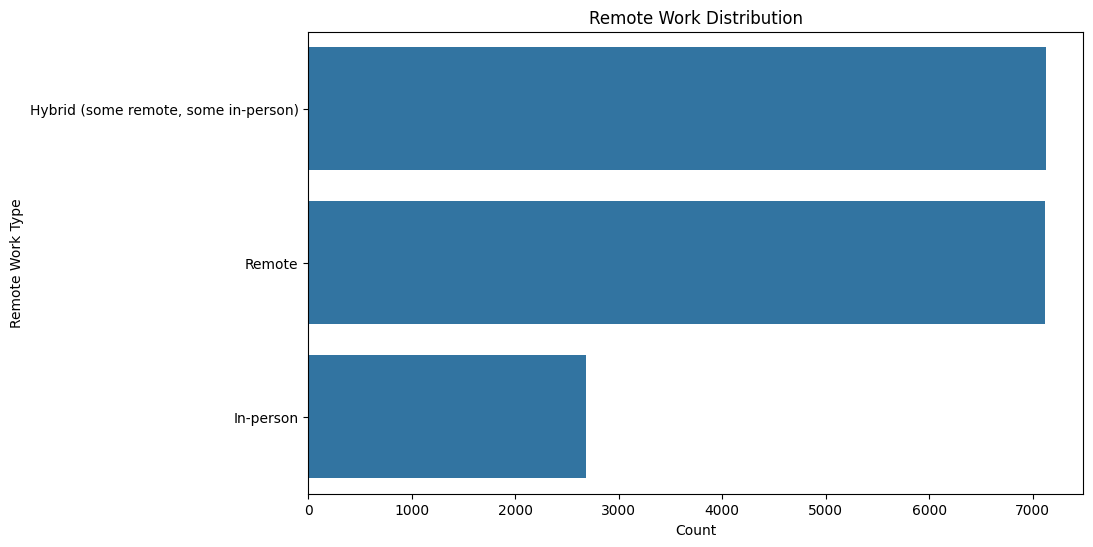

In [197]:
# RemoteWork distribution
plt.figure(figsize=(10, 6))
sns.countplot(y=df1['RemoteWork'], order=df1['RemoteWork'].value_counts().index)
plt.title('Remote Work Distribution')
plt.xlabel('Count')
plt.ylabel('Remote Work Type')
plt.show()

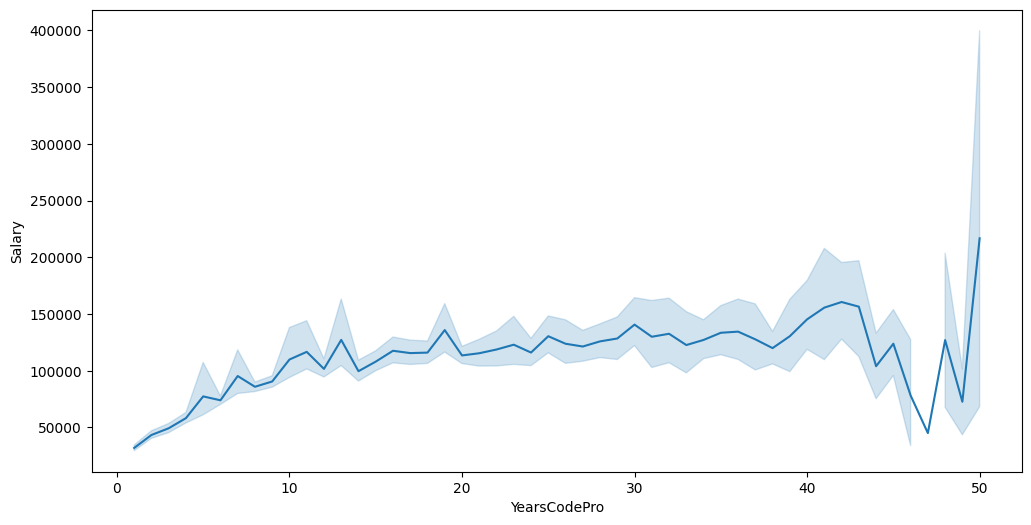

In [198]:
# Salary vs. Years of Professional Coding Experience
plt.figure(figsize=(12, 6))
sns.lineplot(x=df1['YearsCodePro'], y=df1['Salary'])
# plt.title("Salary Distribution by Years of Professional Coding Experience")
# plt.xlabel("Years of Professional Coding Experience")
# plt.ylabel("Salary")
# plt.xticks(rotation=45)
plt.show()

In [199]:
# Preprocessing pipeline
df1 = df1.drop_duplicates()

numerical_features = ['YearsCodePro']
categorical_features = ['Employment', 'RemoteWork','Age']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ]
)

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

In [200]:
X = df1.drop('Salary',axis=1)
y = df1['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the model
model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['YearsCodePro']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Employment', 'RemoteWork',
                                                   'Age'])])),
                ('regressor', RandomForestRegressor(random_state=42))])

In [201]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Evaluate the model
y_pred = model.predict(X_test)

# Evaluate the Model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 59419.24645557705
Mean Squared Error: 30608991034.36702
R^2 Score: -2.3737519488717274
